# Madhya Pradesh: Part 2

In [1]:
import pandas as pd # used for handling the dataset
import numpy as np #used for handling numbers/scientific computing
import matplotlib.pyplot as plt #used for plotting the datapoints
import seaborn as sb #used for statistical data visualization

# Data Preprocessing

In [2]:
# importing the dataset into 'raw_data' variable 
raw_data = pd.read_csv(r'F:\Sem_3\ML_Project\ahs-woman-1\AHS_Woman_23_Madhya_Pradesh\AHS_Woman_23_Madhya_Pradesh_Part_2.csv')

C:\Users\anike\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (118,178,185) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Printing the type of raw_data 
type(raw_data)

pandas.core.frame.DataFrame

In [4]:
# 'shape' gives us the contents of dataset i.e., rows/entries/records/tuples = 866736
#                                                columns/features/attributes/variables = 202
raw_data.shape

(784809, 201)

In [5]:
# Names of the attributes in the dataset is
list(raw_data.columns)

['w_id',
 'hl_id',
 'client_w_id',
 'state',
 'district',
 'rural',
 'stratum_code',
 'psu_id',
 'house_no',
 'house_hold_no',
 'year_of_intr',
 'month_of_intr',
 'date_of_intr',
 'result_of_interview',
 'other_int_code',
 'serial_no',
 'identifcation_code',
 'age',
 'marital_status',
 'delivered_any_baby',
 'born_alive_female',
 'born_alive_male',
 'born_alive_total',
 'surviving_female',
 'surviving_male',
 'surviving_total',
 'mother_age_when_baby_was_born',
 'outcome_pregnancy',
 'last_preg_no',
 'previous_last_preg_no',
 'second_last_preg_no',
 'third_last_preg_no',
 'w_expall_status',
 'w_status',
 'twsi_id',
 'client_twsi_id',
 'currently_widow',
 'is_tubectomy',
 'is_vasectomy',
 'is_copper_t',
 'is_pills_daily',
 'is_piils_weekly',
 'is_emergency_contraceptive',
 'is_condom',
 'is_moder_methods',
 'is_contraceptive',
 'is_periodic_abstinence',
 'is_withdrawal',
 'is_amenorrahoea',
 'is_other_traditional_method',
 'is_currently_pregnant',
 'pregnant_month',
 'is_anc_registered'

In [6]:
# 'info' to get a concise summary of the dataframe
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784809 entries, 0 to 784808
Columns: 201 entries, w_id to id
dtypes: float64(174), int64(23), object(4)
memory usage: 1.2+ GB


In [7]:
# to view some basic statistical details like percentile, mean, std of dataframe(data)
raw_data.describe()

,w_id,hl_id,client_w_id,state,district,rural,stratum_code,psu_id,house_no,house_hold_no,...,traditional,anym,respondentname,rtelephoneno,isnewrecord,recordupdatedcount,recordstatus,schedule_id,year,id
count,0.0,0.0,0.0,784809.0,784809.000000,784809.000000,784809.000000,7.848090e+05,784809.000000,784809.000000,...,0.0,0.0,0.0,0.0,113399.0,784787.000000,784787.000000,784788.0,784788.000000,7.847880e+05
mean,NaN,NaN,NaN,23.0,24.843647,1.316867,0.951602,1.110171e+08,144.383744,1.493813,...,NaN,NaN,NaN,NaN,1.0,1.083067,1.999996,2.0,2.542777,8.272802e+06
std,NaN,NaN,NaN,0.0,12.698813,0.465255,0.763541,3.706457e+05,140.737798,1.093370,...,NaN,NaN,NaN,NaN,0.0,0.346470,0.001955,0.0,0.498167,2.584892e+05
min,NaN,NaN,NaN,23.0,1.000000,1.000000,0.000000,1.102683e+08,1.000000,1.000000,...,NaN,NaN,NaN,NaN,1.0,0.000000,1.000000,2.0,2.000000,7.775550e+06
25%,NaN,NaN,NaN,23.0,17.000000,1.000000,0.000000,1.107191e+08,52.000000,1.000000,...,NaN,NaN,NaN,NaN,1.0,1.000000,2.000000,2.0,2.000000,8.034717e+06
50%,NaN,NaN,NaN,23.0,26.000000,1.000000,1.000000,1.110411e+08,112.000000,1.000000,...,NaN,NaN,NaN,NaN,1.0,1.000000,2.000000,2.0,3.000000,8.294302e+06
75%,NaN,NaN,NaN,23.0,36.000000,2.000000,2.000000,1.113330e+08,199.000000,2.000000,...,NaN,NaN,NaN,NaN,1.0,1.000000,2.000000,2.0,3.000000,8.490511e+06
max,NaN,NaN,NaN,23.0,45.000000,2.000000,2.000000,1.116531e+08,2262.000000,92.000000,...,NaN,NaN,NaN,NaN,1.0,13.000000,2.000000,2.0,3.000000,8.707882e+06


# 1.Data Wrangling
* Preprocessing On Columns(data_cols)
* Preprocessing On Rows(data_rows)
* Dropping Uncessary Features
* Resetting the Indexes
* Rearranging the Columns

In [8]:
#Selecting the features that are needed
data_cols = raw_data[['mother_age_when_baby_was_born','outcome_pregnancy','fp_method_used','symptoms_pertaining_illness','diagnosed_for','regular_treatment','chew','smoke','alcohol','drinking_water_source','kitchen_availability','is_washing_machine','is_bicycle','is_scooter','is_sewing_machine','ever_conceived','no_of_times_conceived','age_at_first_conception','delivered_any_baby']]

In [9]:
# 'shape' gives us the contents of dataset i.e., rows/entries/records/tuples = 1048575 
#                                                columns/features/attributes/variables = 19
data_cols.shape

(784809, 19)

In [10]:
# 'info' to get a concise summary of the dataframe
data_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784809 entries, 0 to 784808
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   mother_age_when_baby_was_born  660596 non-null  float64
 1   outcome_pregnancy              689411 non-null  float64
 2   fp_method_used                 433494 non-null  float64
 3   symptoms_pertaining_illness    784792 non-null  float64
 4   diagnosed_for                  784792 non-null  float64
 5   regular_treatment              45529 non-null   float64
 6   chew                           621092 non-null  float64
 7   smoke                          621092 non-null  float64
 8   alcohol                        621092 non-null  float64
 9   drinking_water_source          676495 non-null  float64
 10  kitchen_availability           676496 non-null  float64
 11  is_washing_machine             676493 non-null  float64
 12  is_bicycle                    

In [11]:
# to view some basic statistical details like percentile, mean, std of dataframe(data)
data_cols.describe()

,mother_age_when_baby_was_born,outcome_pregnancy,fp_method_used,symptoms_pertaining_illness,diagnosed_for,regular_treatment,chew,smoke,alcohol,drinking_water_source,kitchen_availability,is_washing_machine,is_bicycle,is_scooter,is_sewing_machine,ever_conceived,no_of_times_conceived,age_at_first_conception,delivered_any_baby
count,660596.000000,689411.000000,433494.000000,784792.000000,784792.000000,45529.000000,621092.000000,621092.000000,621092.000000,676495.000000,676496.000000,676493.000000,676493.000000,676492.000000,676493.000000,725542.000000,689396.000000,689395.000000,689403.000000
mean,20.455257,1.877273,2.417300,92.138678,1.885436,1.795976,6.700141,3.957979,3.929096,3.147717,1.648869,1.932548,1.566943,1.761143,1.794638,1.049821,2.922821,19.633579,1.041784
std,3.362349,0.328123,3.025054,24.361750,12.066763,0.599666,1.035684,0.383939,0.468965,1.663570,0.725347,0.250804,0.495499,0.426386,0.403966,0.217574,1.532879,3.388919,0.200095
min,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,1.000000
25%,18.000000,2.000000,1.000000,99.000000,0.000000,1.000000,7.000000,4.000000,4.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,17.000000,1.000000
50%,20.000000,2.000000,1.000000,99.000000,0.000000,2.000000,7.000000,4.000000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,19.000000,1.000000
75%,22.000000,2.000000,1.000000,99.000000,0.000000,2.000000,7.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,4.000000,21.000000,1.000000
max,49.000000,2.000000,14.000000,99.000000,99.000000,3.000000,9.000000,5.000000,6.000000,9.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,17.000000,49.000000,2.000000


In [12]:
# 'isnull' detects the missing values and 'sum' returns the total count of null tuples for each attribute/column
data_cols.isnull().sum()

mother_age_when_baby_was_born    124213
outcome_pregnancy                 95398
fp_method_used                   351315
symptoms_pertaining_illness          17
diagnosed_for                        17
regular_treatment                739280
chew                             163717
smoke                            163717
alcohol                          163717
drinking_water_source            108314
kitchen_availability             108313
is_washing_machine               108316
is_bicycle                       108316
is_scooter                       108317
is_sewing_machine                108316
ever_conceived                    59267
no_of_times_conceived             95413
age_at_first_conception           95414
delivered_any_baby                95406
dtype: int64

In [13]:
data_cols.shape

(784809, 19)

In [14]:
# removing missing values from dataset(axis = 0 states for rows and 'any' states for any NA attribute in dataset)
data_rows = data_cols.dropna(how='any',axis=0)

In [15]:
data_rows = data_rows.astype(np.int64)

In [16]:
data_rows.shape

(21457, 19)

In [17]:
data_rows.isnull().sum()

mother_age_when_baby_was_born    0
outcome_pregnancy                0
fp_method_used                   0
symptoms_pertaining_illness      0
diagnosed_for                    0
regular_treatment                0
chew                             0
smoke                            0
alcohol                          0
drinking_water_source            0
kitchen_availability             0
is_washing_machine               0
is_bicycle                       0
is_scooter                       0
is_sewing_machine                0
ever_conceived                   0
no_of_times_conceived            0
age_at_first_conception          0
delivered_any_baby               0
dtype: int64

In [18]:
# Resetting the indexes
data_rows.reset_index(drop=True)

,mother_age_when_baby_was_born,outcome_pregnancy,fp_method_used,symptoms_pertaining_illness,diagnosed_for,regular_treatment,chew,smoke,alcohol,drinking_water_source,kitchen_availability,is_washing_machine,is_bicycle,is_scooter,is_sewing_machine,ever_conceived,no_of_times_conceived,age_at_first_conception,delivered_any_baby
0,17,2,1,99,2,1,7,4,4,4,1,2,1,1,1,1,3,16,1
1,19,2,1,99,2,2,7,4,4,3,1,2,1,1,1,1,6,19,1
2,17,2,1,99,19,3,7,4,4,3,1,2,2,2,2,1,7,16,1
3,16,2,1,4,19,3,7,4,4,2,1,1,1,2,1,1,7,15,1
4,22,2,1,1,7,2,7,4,4,1,1,2,1,2,1,1,2,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21452,21,2,7,1,7,2,7,4,4,2,1,2,1,1,1,1,3,20,1
21453,25,2,7,2,2,2,7,4,4,3,1,2,1,1,2,1,1,24,1
21454,24,2,7,1,7,2,7,4,4,1,1,1,1,1,1,1,5,23,1
21455,24,2,1,13,1,2,7,4,4,2,1,2,1,1,1,1,2,23,1


In [19]:
data_rows.shape

(21457, 19)

In [20]:
data_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21457 entries, 11 to 784754
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   mother_age_when_baby_was_born  21457 non-null  int64
 1   outcome_pregnancy              21457 non-null  int64
 2   fp_method_used                 21457 non-null  int64
 3   symptoms_pertaining_illness    21457 non-null  int64
 4   diagnosed_for                  21457 non-null  int64
 5   regular_treatment              21457 non-null  int64
 6   chew                           21457 non-null  int64
 7   smoke                          21457 non-null  int64
 8   alcohol                        21457 non-null  int64
 9   drinking_water_source          21457 non-null  int64
 10  kitchen_availability           21457 non-null  int64
 11  is_washing_machine             21457 non-null  int64
 12  is_bicycle                     21457 non-null  int64
 13  is_scooter    

In [21]:
data_rows.describe()

,mother_age_when_baby_was_born,outcome_pregnancy,fp_method_used,symptoms_pertaining_illness,diagnosed_for,regular_treatment,chew,smoke,alcohol,drinking_water_source,kitchen_availability,is_washing_machine,is_bicycle,is_scooter,is_sewing_machine,ever_conceived,no_of_times_conceived,age_at_first_conception,delivered_any_baby
count,21457.000000,21457.000000,21457.000000,21457.000000,21457.000000,21457.000000,21457.000000,21457.000000,21457.000000,21457.000000,21457.000000,21457.000000,21457.000000,21457.000000,21457.000000,21457.0,21457.000000,21457.000000,21457.0
mean,20.189961,1.961365,2.229575,29.365708,32.954234,1.799366,6.632754,3.961877,3.943329,3.139908,1.611222,1.928555,1.519411,1.754672,1.781377,1.0,3.337652,19.304796,1.0
std,3.308096,0.192729,2.870213,40.467286,39.068764,0.604763,1.127914,0.373478,0.440064,1.694758,0.698046,0.257573,0.499635,0.430291,0.413322,0.0,1.492098,3.324055,0.0
min,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,11.000000,1.0
25%,18.000000,2.000000,1.000000,4.000000,3.000000,1.000000,7.000000,4.000000,4.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.0,2.000000,17.000000,1.0
50%,20.000000,2.000000,1.000000,7.000000,17.000000,2.000000,7.000000,4.000000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,3.000000,19.000000,1.0
75%,22.000000,2.000000,1.000000,99.000000,99.000000,2.000000,7.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,4.000000,21.000000,1.0
max,49.000000,2.000000,14.000000,99.000000,99.000000,3.000000,9.000000,5.000000,6.000000,9.000000,5.000000,2.000000,2.000000,2.000000,2.000000,1.0,15.000000,48.000000,1.0


In [22]:
df1 = data_rows.drop('outcome_pregnancy', axis = 1)

In [23]:
df1.reset_index(drop=True)

,mother_age_when_baby_was_born,fp_method_used,symptoms_pertaining_illness,diagnosed_for,regular_treatment,chew,smoke,alcohol,drinking_water_source,kitchen_availability,is_washing_machine,is_bicycle,is_scooter,is_sewing_machine,ever_conceived,no_of_times_conceived,age_at_first_conception,delivered_any_baby
0,17,1,99,2,1,7,4,4,4,1,2,1,1,1,1,3,16,1
1,19,1,99,2,2,7,4,4,3,1,2,1,1,1,1,6,19,1
2,17,1,99,19,3,7,4,4,3,1,2,2,2,2,1,7,16,1
3,16,1,4,19,3,7,4,4,2,1,1,1,2,1,1,7,15,1
4,22,1,1,7,2,7,4,4,1,1,2,1,2,1,1,2,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21452,21,7,1,7,2,7,4,4,2,1,2,1,1,1,1,3,20,1
21453,25,7,2,2,2,7,4,4,3,1,2,1,1,2,1,1,24,1
21454,24,7,1,7,2,7,4,4,1,1,1,1,1,1,1,5,23,1
21455,24,1,13,1,2,7,4,4,2,1,2,1,1,1,1,2,23,1


In [24]:
list(df1.columns)

['mother_age_when_baby_was_born',
 'fp_method_used',
 'symptoms_pertaining_illness',
 'diagnosed_for',
 'regular_treatment',
 'chew',
 'smoke',
 'alcohol',
 'drinking_water_source',
 'kitchen_availability',
 'is_washing_machine',
 'is_bicycle',
 'is_scooter',
 'is_sewing_machine',
 'ever_conceived',
 'no_of_times_conceived',
 'age_at_first_conception',
 'delivered_any_baby']

In [25]:
df1['outcome_pregnancy'] = pd.DataFrame(data_rows['outcome_pregnancy'])

In [26]:
list(df1.columns)

['mother_age_when_baby_was_born',
 'fp_method_used',
 'symptoms_pertaining_illness',
 'diagnosed_for',
 'regular_treatment',
 'chew',
 'smoke',
 'alcohol',
 'drinking_water_source',
 'kitchen_availability',
 'is_washing_machine',
 'is_bicycle',
 'is_scooter',
 'is_sewing_machine',
 'ever_conceived',
 'no_of_times_conceived',
 'age_at_first_conception',
 'delivered_any_baby',
 'outcome_pregnancy']

In [27]:
pregnancy_details = df1

In [28]:
list(pregnancy_details.columns)

['mother_age_when_baby_was_born',
 'fp_method_used',
 'symptoms_pertaining_illness',
 'diagnosed_for',
 'regular_treatment',
 'chew',
 'smoke',
 'alcohol',
 'drinking_water_source',
 'kitchen_availability',
 'is_washing_machine',
 'is_bicycle',
 'is_scooter',
 'is_sewing_machine',
 'ever_conceived',
 'no_of_times_conceived',
 'age_at_first_conception',
 'delivered_any_baby',
 'outcome_pregnancy']

In [29]:
pregnancy_details.head()

,mother_age_when_baby_was_born,fp_method_used,symptoms_pertaining_illness,diagnosed_for,regular_treatment,chew,smoke,alcohol,drinking_water_source,kitchen_availability,is_washing_machine,is_bicycle,is_scooter,is_sewing_machine,ever_conceived,no_of_times_conceived,age_at_first_conception,delivered_any_baby,outcome_pregnancy
11,17,1,99,2,1,7,4,4,4,1,2,1,1,1,1,3,16,1,2
74,19,1,99,2,2,7,4,4,3,1,2,1,1,1,1,6,19,1,2
110,17,1,99,19,3,7,4,4,3,1,2,2,2,2,1,7,16,1,2
149,16,1,4,19,3,7,4,4,2,1,1,1,2,1,1,7,15,1,2
175,22,1,1,7,2,7,4,4,1,1,2,1,2,1,1,2,22,1,2


In [30]:
pregnancy_details.isnull().sum()

mother_age_when_baby_was_born    0
fp_method_used                   0
symptoms_pertaining_illness      0
diagnosed_for                    0
regular_treatment                0
chew                             0
smoke                            0
alcohol                          0
drinking_water_source            0
kitchen_availability             0
is_washing_machine               0
is_bicycle                       0
is_scooter                       0
is_sewing_machine                0
ever_conceived                   0
no_of_times_conceived            0
age_at_first_conception          0
delivered_any_baby               0
outcome_pregnancy                0
dtype: int64

In [31]:
pregnancy_details.shape

(21457, 19)

In [32]:
pregnancy_details = pregnancy_details.astype(np.int64)

In [33]:
pregnancy_details = pregnancy_details.reset_index(drop=True)

In [34]:
pregnancy_details.shape

(21457, 19)

In [35]:
pregnancy_details.head()

,mother_age_when_baby_was_born,fp_method_used,symptoms_pertaining_illness,diagnosed_for,regular_treatment,chew,smoke,alcohol,drinking_water_source,kitchen_availability,is_washing_machine,is_bicycle,is_scooter,is_sewing_machine,ever_conceived,no_of_times_conceived,age_at_first_conception,delivered_any_baby,outcome_pregnancy
0,17,1,99,2,1,7,4,4,4,1,2,1,1,1,1,3,16,1,2
1,19,1,99,2,2,7,4,4,3,1,2,1,1,1,1,6,19,1,2
2,17,1,99,19,3,7,4,4,3,1,2,2,2,2,1,7,16,1,2
3,16,1,4,19,3,7,4,4,2,1,1,1,2,1,1,7,15,1,2
4,22,1,1,7,2,7,4,4,1,1,2,1,2,1,1,2,22,1,2


In [36]:
#Saving the output(without indexes) of dataframe(data_rows) to csv file named as "pregnancy_details"
#pregnancy_details.to_csv(r'F:\Sem_3\ML_Project\preg\Cleaned_Data\Bihar_Part2_Cleaned.csv',index = False)

   # 2. Correlations for the Pregnancy Details

,mother_age_when_baby_was_born,fp_method_used,symptoms_pertaining_illness,diagnosed_for,regular_treatment,chew,smoke,alcohol,drinking_water_source,kitchen_availability,is_washing_machine,is_bicycle,is_scooter,is_sewing_machine,ever_conceived,no_of_times_conceived,age_at_first_conception,delivered_any_baby,outcome_pregnancy
mother_age_when_baby_was_born,1.000000,0.031137,0.034440,-0.031399,0.002255,0.005370,-0.001645,0.008516,-0.040737,-0.055894,-0.115402,-0.038804,-0.077077,-0.069294,NaN,-0.161276,0.989447,NaN,-0.042145
fp_method_used,0.031137,1.000000,-0.038224,0.093616,0.008279,0.030205,0.024817,0.015615,-0.036900,-0.018537,-0.042369,-0.023518,-0.024436,-0.034496,NaN,-0.048954,0.039992,NaN,-0.107313
symptoms_pertaining_illness,0.034440,-0.038224,1.000000,-0.218861,0.041058,-0.093480,0.028041,0.018945,0.024619,-0.070724,0.002194,-0.058605,-0.016905,-0.018437,NaN,-0.052850,0.041563,NaN,0.019225
diagnosed_for,-0.031399,0.093616,-0.218861,1.000000,-0.051767,0.038827,0.016896,-0.008197,0.090163,0.091986,0.080634,0.038231,0.097900,0.083448,NaN,-0.052639,-0.027265,NaN,-0.055268
regular_treatment,0.002255,0.008279,0.041058,-0.051767,1.000000,-0.013938,-0.002913,-0.025738,-0.012719,0.003788,-0.012738,0.009573,-0.007368,-0.002456,NaN,-0.025846,0.003064,NaN,0.006668
chew,0.005370,0.030205,-0.093480,0.038827,-0.013938,1.000000,0.405780,0.378922,-0.013545,-0.001987,-0.049088,0.037875,-0.037278,-0.003474,NaN,-0.026123,0.004796,NaN,-0.004598
smoke,-0.001645,0.024817,0.028041,0.016896,-0.002913,0.405780,1.000000,0.646453,0.009826,-0.010372,-0.008451,0.019202,0.007344,0.019977,NaN,-0.003245,0.000388,NaN,0.009322
alcohol,0.008516,0.015615,0.018945,-0.008197,-0.025738,0.378922,0.646453,1.000000,-0.022552,-0.016652,-0.016808,0.012210,-0.014847,-0.002010,NaN,0.000396,0.010694,NaN,0.013199
drinking_water_source,-0.040737,-0.036900,0.024619,0.090163,-0.012719,-0.013545,0.009826,-0.022552,1.000000,0.133874,0.140772,0.051504,0.165690,0.175276,NaN,0.028335,-0.041159,NaN,-0.028112
kitchen_availability,-0.055894,-0.018537,-0.070724,0.091986,0.003788,-0.001987,-0.010372,-0.016652,0.133874,1.000000,0.172122,0.105961,0.221034,0.202125,NaN,0.090376,-0.058720,NaN,-0.022275


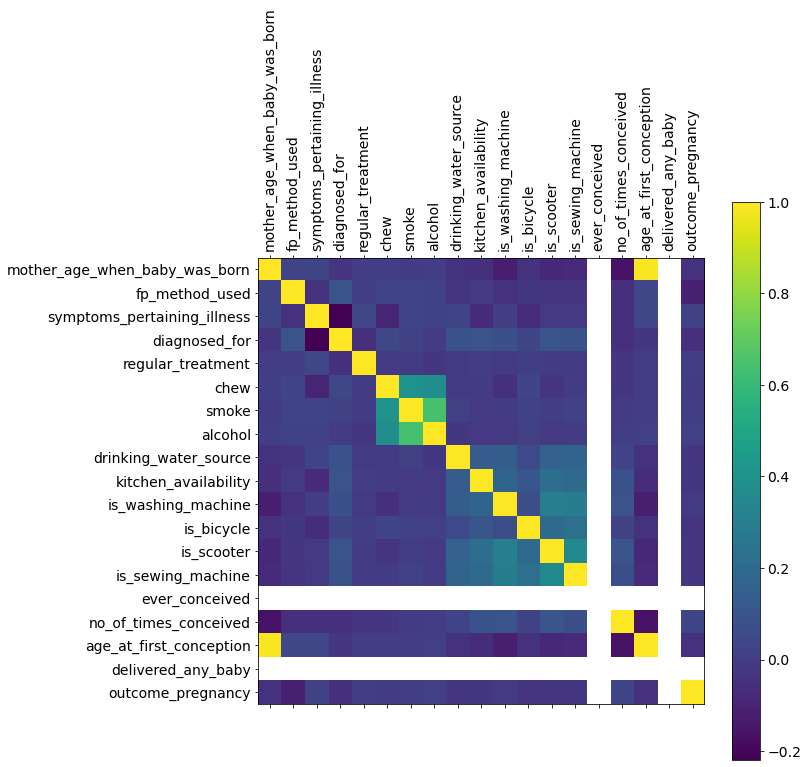

In [37]:
def corr_matrix():
        
    # For computing pairwise correlation of columns, excluding NA/null values
    correlation = pregnancy_details.corr(method='pearson')
    correlation
    f = plt.figure(figsize=(10, 10))
    plt.matshow(pregnancy_details.corr(), fignum=f.number)
    plt.xticks(range(pregnancy_details.shape[1]), pregnancy_details.columns, fontsize=14, rotation=90)
    plt.yticks(range(pregnancy_details.shape[1]), pregnancy_details.columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    #plt.title('Correlation Matrix', fontsize=16);
    plt.savefig(r'F:\Sem_3\ML_Project\preg\Visualizations\Bihar\Part_2\1.png')
    return correlation
corr_matrix()

# 3. Exploratory Data Analysis
* Pairplots
* Boxplots
* Barplots
* Violinplots

In [38]:
import seaborn as sb
class EDA():
    
    def pairplots():
        sb.pairplot(pregnancy_details)
        sb.set_style('darkgrid')

    def boxplots():
         for c in pregnancy_details.columns[1:]:
            pregnancy_details.boxplot(c,by='outcome_pregnancy',figsize=(8,4),fontsize=14,grid=True)
            plt.title("{}\n".format(c),fontsize=16)
            plt.xlabel("Pregnancy Outcome", fontsize=16)
            plt.savefig(r"F:\Sem_3\ML_Project\preg\Visualizations\MPMP\Part_2\box.png")

    def count_barplots():
        plt.figure(figsize=(13,6))
        sb.set_style('darkgrid')
        sb.countplot(y='outcome_pregnancy',hue='chew',data=pregnancy_details)
        plt.title("Bar chart of outcome of pregnancy compared to consumption of tobacco", fontsize=17)
        plt.xlabel("Count", fontsize=15)
        plt.ylabel("Outcome Of Pregnancy", fontsize=15)
        plt.legend(['Pan with tobacco','Pan without tobacco','Gutka/Pan masala with tobacco','Gutka/Pan masala without tobacco','Tobacco only','Ex–Chewer','Never chewed','Not known'],loc=1)
        plt.savefig(r"F:\Sem_3\ML_Project\preg\Visualizations\MPMP\Part_2\1.png")

        plt.figure(figsize=(13,6))
        sb.set_style('darkgrid')
        sb.countplot(y='outcome_pregnancy',hue='drinking_water_source',data=pregnancy_details,orient='v')
        plt.title("Bar chart of outcome of pregnancy compared to source of drinking water", fontsize=17)
        plt.xlabel("Count", fontsize=15)
        plt.ylabel("Outcome Of Pregnancy", fontsize=15)
        plt.legend(['Piped water into dwelling/yard/plot','Public tap/standpipe','Hand pump', 'Tube well or Borehole', 'Protected dug well', 'Unprotected dug well', 'Tanker /truck/Cart with Surface watersmall tank', 'Surface water', 'other sources'],loc=1)
        plt.savefig(r"F:\Sem_3\ML_Project\preg\Visualizations\MP\2.png")

        plt.figure(figsize=(13,6))
        sb.set_style('darkgrid')
        sb.countplot(y='outcome_pregnancy',hue='kitchen_availability',data=pregnancy_details)
        plt.title("Bar chart of outcome of pregnancy compared to availability of kitchen", fontsize=17)
        plt.xlabel("Count", fontsize=15)
        plt.ylabel("Outcome Of Pregnancy", fontsize=15)
        plt.legend(['Cooking inside the house:Has kitchen','Does not have kitchen','Cooking outside house:Has kitchen','Does not have kitchen','No cooking'], loc=1)
        plt.savefig(r"F:\Sem_3\ML_Project\preg\Visualizations\MP\3.png")

        plt.figure(figsize=(13,6))
        sb.set_style('darkgrid')
        sb.countplot(y='outcome_pregnancy',hue='regular_treatment',data=pregnancy_details)
        plt.title("Bar chart of outcome of pregnancy compared to the treament taken", fontsize=17)
        plt.xlabel("Count", fontsize=15)
        plt.ylabel("Outcome Of Pregnancy", fontsize=15)
        plt.legend(['Not Regularly','Regularly','No Treatment'], loc=1)
        plt.savefig(r"F:\Sem_3\ML_Project\preg\Visualizations\MP\4.png")

        plt.figure(figsize=(13,6))
        sb.set_style('darkgrid')
        sb.countplot(y='outcome_pregnancy',hue='no_of_times_conceived',data=pregnancy_details)
        plt.title("Bar chart of outcome of pregnancy compared to the number of times conceived", fontsize=17)
        plt.xlabel("Count", fontsize=15)
        plt.ylabel("Outcome Of Pregnancy", fontsize=15)
        plt.legend(loc=1)
        plt.savefig(r"F:\Sem_3\ML_Project\preg\Visualizations\MP\5.png")

        plt.figure(figsize=(13,6))
        sb.set_style('darkgrid')
        sb.countplot(y='outcome_pregnancy',hue='is_sewing_machine',data=pregnancy_details)
        plt.title("Bar chart of outcome of pregnancy compared to use of sewing machine", fontsize=17)
        plt.xlabel("Count", fontsize=15)
        plt.ylabel("Outcome Of Pregnancy", fontsize=15)
        plt.legend(['Uses Sewing Machine','Does not use Sewing Machine'],loc=1)
        plt.savefig(r"F:\Sem_3\ML_Project\preg\Visualizations\MP\6.png")

        plt.figure(figsize=(13,6))
        sb.set_style('darkgrid')
        sb.countplot(y='outcome_pregnancy',hue='mother_age_when_baby_was_born',data=pregnancy_details)
        plt.title('Bar chart of outcome of pregnancy compared to the mother age when baby was born',fontsize=17)
        plt.xlabel('Count',fontsize=15)
        plt.ylabel('Outcome Of Pregnancy',fontsize=15)
        plt.savefig(r"F:\Sem_3\ML_Project\preg\Visualizations\MP\7.png")

        plt.figure(figsize=(13,6))
        sb.set_style('darkgrid')
        sb.countplot(y='outcome_pregnancy',hue='symptoms_pertaining_illness',data=pregnancy_details)
        plt.title('Bar chart of outcome of pregnancy compared to symptoms pretaining the illness',fontsize=17)
        plt.xlabel('Count',fontsize=15)
        plt.ylabel('Outcome Of Pregnancy',fontsize=15)
        plt.legend(['Diseases of respiratory system','Diseases of cardiovascular system','Diseases of the central nervous  system','Diseases of   musculo-skeletal system','Diseases of gastrointestinal system','Diseases of genito urinary system','Skin diseases','Goitre','Elephantiasis','Others','Asymptomatic','Eye Problem/diseases','ENT problems/diseases','Mouth and Dental Problems','Others','No Symptoms of chronic diseases'])
        plt.savefig(r"F:\Sem_3\ML_Project\preg\Visualizations\MP\8.png")
        
        plt.figure(figsize=(13,6))
        sb.set_style('darkgrid')
        sb.countplot(y='outcome_pregnancy',hue='is_scooter',data=pregnancy_details)
        plt.title('Bar chart of outcome of pregnancy compared to the use of scooter',fontsize=17)
        plt.xlabel('Count',fontsize=15)
        plt.ylabel('Outcome Of Pregnancy',fontsize=15)
        plt.legend(['Uses Scooter','Does not use Scooter'])
        plt.savefig(r"F:\Sem_3\ML_Project\preg\Visualizations\MP\9.png")
        
        plt.figure(figsize=(13,6))
        sb.set_style('darkgrid')
        sb.countplot(y='outcome_pregnancy',hue='is_bicycle',data=pregnancy_details)
        plt.title('Bar chart of outcome of pregnancy compared to the use of bicycle',fontsize=17)
        plt.xlabel('Count',fontsize=15)
        plt.ylabel('Outcome Of Pregnancy',fontsize=15)
        plt.savefig(r"F:\Sem_3\ML_Project\preg\Visualizations\MP\10.png")

        plt.figure(figsize=(13,6))
        sb.set_style('darkgrid')
        sb.countplot(y='outcome_pregnancy',hue='diagnosed_for',data=pregnancy_details)
        plt.title('Bar chart of outcome of pregnancy compared to the diseased diagnosed for',fontsize=17)
        plt.xlabel('Count',fontsize=15)
        plt.ylabel('Outcome Of Pregnancy',fontsize=15)
        plt.legend()
        plt.savefig(r"F:\Sem_3\ML_Project\preg\Visualizations\MP\11.png")
        
    def violinplots():
        sb.catplot(x="fp_method_used",y="outcome_pregnancy",legend=True,data=pregnancy_details,kind="violin")
        
        sb.catplot(x="symptoms_pertaining_illness",y="outcome_pregnancy",legend=True,data=pregnancy_details,kind="violin")
        
        sb.catplot(x="regular_treatment",y="outcome_pregnancy",legend=True,data=pregnancy_details,kind="violin")
        
        sb.catplot(x="kitchen_availability",y="outcome_pregnancy",legend=True,data=pregnancy_details,kind="violin")
    

# Modelling and Algorithms 

In [39]:
#importing libraries
from sklearn.model_selection import train_test_split

### Accuracy Score
* Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.

In [40]:
# for Printing accuracy classification score
from sklearn.metrics import accuracy_score

### Confusion Matrix
* Confusion Matrix as the name suggests gives us a matrix as output and describes the complete performance of the model.

In [41]:
# for Computing confusion matrix to evaluate the accuracy of a classification
from sklearn.metrics import confusion_matrix

### Classification Report
* Used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report

In [42]:
# Prints a text report showing the main classification metrics
from sklearn.metrics import classification_report

### Mean Squared Error
* Mean Squared Error(MSE) is quite similar to Mean Absolute Error, the only difference being that MSE takes the average of the square of the difference between the original values and the predicted values.

In [43]:
# Prints Mean squared error regression loss
from sklearn.metrics import mean_squared_error

In [44]:
x = pregnancy_details.drop('outcome_pregnancy', axis=1)
y = pregnancy_details['outcome_pregnancy']

### 'x' consists of all the data except class label(outcome_pregnancy)
### 'y' contains only class lable column i.e., outcome_pregnancy

In [45]:
#Splitting the dataset content into random train and test subsets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 1)
print('Training dataset shape:', xtrain.shape, ytrain.shape)
print('Testing dataset shape:', xtest.shape, ytest.shape)

Training dataset shape: (15019, 18) (15019,)
Testing dataset shape: (6438, 18) (6438,)


# Model-1: Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
class logisticRegression():
    lor = LogisticRegression()
    lor.fit(xtrain,ytrain)
    yp_lr_train = lor.predict(xtrain)
    yp_lr_test = lor.predict(xtest)
    
    def training():
        yp_lr_train = logisticRegression.yp_lr_train
        print("Accuracy of logistic regression for training data:",accuracy_score(ytrain,yp_lr_train))
        print("\nClassification report of logistic regression for training data :\n\n",classification_report(ytrain,yp_lr_train))
        print("Confusion_matrix of logistic regression for training data:\n",confusion_matrix(ytrain,yp_lr_train))
        print('\nMean_squared_error of logistic regression for training data:',mean_squared_error(ytrain,yp_lr_train))

    def testing():
        yp_lr_test = logisticRegression.yp_lr_test
        print("Accuracy of logistic regression for testing data:",accuracy_score(ytest,yp_lr_test))
        print('\nClassification of logistic regression for testing data:\n\n',classification_report(ytest,yp_lr_test))
        print("Confusion_matrix of logistic regression for testing data:\n",confusion_matrix(ytest,yp_lr_test))
        print('Mean_squared_error of logistic regression for testing data:\n',mean_squared_error(ytest,yp_lr_test))

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [54]:
logisticRegression.training()

Accuracy of logistic regression for training data: 0.9602503495572275

Classification report of logistic regression for training data :

               precision    recall  f1-score   support

           1       0.00      0.00      0.00       596
           2       0.96      1.00      0.98     14423

    accuracy                           0.96     15019
   macro avg       0.48      0.50      0.49     15019
weighted avg       0.92      0.96      0.94     15019

Confusion_matrix of logistic regression for training data:
 [[    0   596]
 [    1 14422]]

Mean_squared_error of logistic regression for training data: 0.03974965044277249


In [55]:
logisticRegression.testing()

Accuracy of logistic regression for testing data: 0.9638086362224293

Classification of logistic regression for testing data:

               precision    recall  f1-score   support

           1       0.00      0.00      0.00       233
           2       0.96      1.00      0.98      6205

    accuracy                           0.96      6438
   macro avg       0.48      0.50      0.49      6438
weighted avg       0.93      0.96      0.95      6438

Confusion_matrix of logistic regression for testing data:
 [[   0  233]
 [   0 6205]]
Mean_squared_error of logistic regression for testing data:
 0.03619136377757067


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model-2: Support Vector Machines(SVM)
* Kernel.1 = Linear
* Kernel.2 = Sigmoid
* Kernel.3 = Radial Basis Function(RBF)

### Kernel.1 = Linear

In [47]:
from sklearn import svm
class svc_linear():
    
    lin_svc = svm.SVC(kernel='linear')

    lin_svc.fit(xtrain,ytrain)
    yp_svm_lin_train = lin_svc.predict(xtrain)
    yp_svm_lin_test = lin_svc.predict(xtest)

    def training():
        yp_svm_lin_train = svc_linear.yp_svm_lin_train
        print('Accuracy of Linear-SVM for training data:',accuracy_score(ytrain,yp_svm_lin_train))
        print('\nClassification Report of Linear-SVM for training data:\n\n',classification_report(ytrain,yp_svm_lin_train))
        print('Confusion_matrix of Linear-SVM for training data:\n',confusion_matrix(ytrain,yp_svm_lin_train))
        print('\nMean_squared_error of Linear-SVM for training data:',mean_squared_error(ytrain,yp_svm_lin_train))

    def testing():
        yp_svm_lin_test = svc_linear.yp_svm_lin_test
        print('Accuracy of Linear-SVM for testing data:',accuracy_score(ytest,yp_svm_lin_test))
        print('\nClassification Report of Linear-SVM for testing data:\n\n',classification_report(ytest,yp_svm_lin_test))
        print('Confusion_matrix of Linear-SVM for testing data:\n',confusion_matrix(ytest,yp_svm_lin_test))
        print('\nMean_squared_error of Linear-SVM for testing data:',mean_squared_error(ytest,yp_svm_lin_test))

In [56]:
svc_linear.training()

Accuracy of Linear-SVM for training data: 0.9603169318862774

Classification Report of Linear-SVM for training data:

               precision    recall  f1-score   support

           1       0.00      0.00      0.00       596
           2       0.96      1.00      0.98     14423

    accuracy                           0.96     15019
   macro avg       0.48      0.50      0.49     15019
weighted avg       0.92      0.96      0.94     15019

Confusion_matrix of Linear-SVM for training data:
 [[    0   596]
 [    0 14423]]

Mean_squared_error of Linear-SVM for training data: 0.03968306811372262


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
svc_linear.testing()

Accuracy of Linear-SVM for testing data: 0.9638086362224293

Classification Report of Linear-SVM for testing data:

               precision    recall  f1-score   support

           1       0.00      0.00      0.00       233
           2       0.96      1.00      0.98      6205

    accuracy                           0.96      6438
   macro avg       0.48      0.50      0.49      6438
weighted avg       0.93      0.96      0.95      6438

Confusion_matrix of Linear-SVM for testing data:
 [[   0  233]
 [   0 6205]]

Mean_squared_error of Linear-SVM for testing data: 0.03619136377757067


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Kernel.2 = Sigmoid

In [48]:
class svc_sigmoid():
    sig_svc = svm.SVC(kernel='sigmoid')      
    sig_svc.fit(xtrain,ytrain)
    yp_svm_sig_train = sig_svc.predict(xtrain)
    yp_svm_sig_test = sig_svc.predict(xtest)
    
    def training():
        yp_svm_sig_train = svc_sigmoid.yp_svm_sig_train
        print('Accuracy of Sigmoid-SVM for training data:',accuracy_score(ytrain,yp_svm_sig_train))
        print('\nClassification Report of Sigmoid-SVM for training data:\n\n',classification_report(ytrain,yp_svm_sig_train))
        print('Confusion_matrix of Sigmoid-SVM for training data:\n',confusion_matrix(ytrain,yp_svm_sig_train))
        print('\nMean_squared_error of Sigmoid-SVM for training data:',mean_squared_error(ytrain,yp_svm_sig_train))

    def testing():
        yp_svm_sig_test = svc_sigmoid.yp_svm_sig_test
        print('Accuracy of Sigmoid-SVM for testing data:',accuracy_score(ytest,yp_svm_sig_test))
        print('\nClassification Report of Sigmoid-SVM for testing data:\n\n',classification_report(ytest,yp_svm_sig_test))
        print('Confusion_matrix of Sigmoid-SVM for testing data:\n',confusion_matrix(ytest,yp_svm_sig_test))
        print('\nMean_squared_error of Sigmoid-SVM for testing data:',mean_squared_error(ytest,yp_svm_sig_test))

In [58]:
svc_sigmoid.training()

Accuracy of Sigmoid-SVM for training data: 0.9294227312071376

Classification Report of Sigmoid-SVM for training data:

               precision    recall  f1-score   support

           1       0.06      0.05      0.05       596
           2       0.96      0.97      0.96     14423

    accuracy                           0.93     15019
   macro avg       0.51      0.51      0.51     15019
weighted avg       0.93      0.93      0.93     15019

Confusion_matrix of Sigmoid-SVM for training data:
 [[   30   566]
 [  494 13929]]

Mean_squared_error of Sigmoid-SVM for training data: 0.07057726879286237


In [59]:
svc_sigmoid.testing()

Accuracy of Sigmoid-SVM for testing data: 0.9307238272755514

Classification Report of Sigmoid-SVM for testing data:

               precision    recall  f1-score   support

           1       0.05      0.05      0.05       233
           2       0.96      0.96      0.96      6205

    accuracy                           0.93      6438
   macro avg       0.51      0.51      0.51      6438
weighted avg       0.93      0.93      0.93      6438

Confusion_matrix of Sigmoid-SVM for testing data:
 [[  11  222]
 [ 224 5981]]

Mean_squared_error of Sigmoid-SVM for testing data: 0.06927617272444858


### Kernel.2 = Radial Basis Function(RBF)

In [49]:
class svc_rbf():
    rad_svc = svm.SVC(kernel='rbf')      
    rad_svc.fit(xtrain,ytrain)
    yp_svm_rad_train = rad_svc.predict(xtrain)
    yp_svm_rad_test = rad_svc.predict(xtest)
    
    def training():
        yp_svm_rad_train = svc_rbf.yp_svm_rad_train
        print('Accuracy of RBF-SVM for training data:',accuracy_score(ytrain,yp_svm_rad_train))
        print('\nClassification Report of RBF-SVM for training data:\n\n',classification_report(ytrain,yp_svm_rad_train))
        print('Confusion_matrix of RBF-SVM for training data:\n',confusion_matrix(ytrain,yp_svm_rad_train))
        print('\nMean_squared_error of RBF-SVM for training data:',mean_squared_error(ytrain,yp_svm_rad_train))

    def testing():
        yp_svm_rad_test = svc_rbf.yp_svm_rad_test
        print('Accuracy of RBF-SVM for testing data:',accuracy_score(ytest,yp_svm_rad_test))
        print('\nClassification Report of RBF-SVM for testing data:\n\n',classification_report(ytest,yp_svm_rad_test))
        print('Confusion_matrix of RBF-SVM for testing data:\n',confusion_matrix(ytest,yp_svm_rad_test))
        print('\nMean_squared_error of RBF-SVM for testing data:',mean_squared_error(ytest,yp_svm_rad_test))

In [60]:
svc_rbf.training()

Accuracy of RBF-SVM for training data: 0.9603169318862774

Classification Report of RBF-SVM for training data:

               precision    recall  f1-score   support

           1       0.00      0.00      0.00       596
           2       0.96      1.00      0.98     14423

    accuracy                           0.96     15019
   macro avg       0.48      0.50      0.49     15019
weighted avg       0.92      0.96      0.94     15019

Confusion_matrix of RBF-SVM for training data:
 [[    0   596]
 [    0 14423]]

Mean_squared_error of RBF-SVM for training data: 0.03968306811372262


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
svc_rbf.testing()

Accuracy of RBF-SVM for testing data: 0.9638086362224293

Classification Report of RBF-SVM for testing data:

               precision    recall  f1-score   support

           1       0.00      0.00      0.00       233
           2       0.96      1.00      0.98      6205

    accuracy                           0.96      6438
   macro avg       0.48      0.50      0.49      6438
weighted avg       0.93      0.96      0.95      6438

Confusion_matrix of RBF-SVM for testing data:
 [[   0  233]
 [   0 6205]]

Mean_squared_error of RBF-SVM for testing data: 0.03619136377757067


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model-3: Decision Tree

In [50]:
from sklearn import tree
import graphviz

class decisionTree():
    dt = tree.DecisionTreeClassifier(criterion='entropy')
    dt.fit(xtrain,ytrain)
    yp_dt_train = dt.predict(xtrain)
    yp_dt_test = dt.predict(xtest)

    def training():
        yp_dt_train = decisionTree.yp_dt_train
        print('Accuracy of Decision-Tree for training data:',accuracy_score(ytrain,yp_dt_train))
        print('\nClassification Report of Decision Tree for training data:\n\n',classification_report(ytrain,yp_dt_train))
        print('Confusion_matrix of Decision-Tree for training data:\n',confusion_matrix(ytrain,yp_dt_train))
        print('\nMean_squared_error of Decision-Treefor training data:',mean_squared_error(ytrain,yp_dt_train))

    def testing():
        yp_dt_test = decisionTree.yp_dt_test 
        print('Accuracy of Decision-Tree for testing data:',accuracy_score(ytest,yp_dt_test))
        print('\nClassification of Decision-Tree for testing data:\n\n',classification_report(ytest,yp_dt_test)) 
        print('Classification of Decision-Tree for testing data:\n',confusion_matrix(ytest,yp_dt_test))
        print('\nMean_squared_error of Decision-Tree for testing data:',mean_squared_error(ytest,yp_dt_test))
        
    def DT_plot():
        dot_data = tree.export_graphviz(decisionTree.dt, out_file=None,max_depth=5, filled=True, rounded=True, special_characters=True)  
        graph = graphviz.Source(dot_data)  
        #graph.save(r"F:\Sem_3\ML_Project\preg\Visualizations\Bihar\Part_2\dt.png")
        return graph

In [62]:
decisionTree.training()

Accuracy of Decision-Tree for training data: 0.9974698714961049

Classification Report of Decision Tree for training data:

               precision    recall  f1-score   support

           1       0.95      0.99      0.97       596
           2       1.00      1.00      1.00     14423

    accuracy                           1.00     15019
   macro avg       0.97      0.99      0.98     15019
weighted avg       1.00      1.00      1.00     15019

Confusion_matrix of Decision-Tree for training data:
 [[  590     6]
 [   32 14391]]

Mean_squared_error of Decision-Treefor training data: 0.0025301285038950663


In [63]:
decisionTree.testing()

Accuracy of Decision-Tree for testing data: 0.924044734389562

Classification of Decision-Tree for testing data:

               precision    recall  f1-score   support

           1       0.08      0.11      0.10       233
           2       0.97      0.95      0.96      6205

    accuracy                           0.92      6438
   macro avg       0.53      0.53      0.53      6438
weighted avg       0.93      0.92      0.93      6438

Classification of Decision-Tree for testing data:
 [[  26  207]
 [ 282 5923]]

Mean_squared_error of Decision-Tree for testing data: 0.07595526561043803


# Model-4: k-Nearest Neighbor

In [51]:
from sklearn.neighbors import KNeighborsClassifier

class KNN(): 
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(xtrain, ytrain)
    yp_knn_train = knn.predict(xtrain)
    yp_knn_test = knn.predict(xtest)
    
    def knn_plot():
        error_rate = []
        for i in range(1,10):

            knn = KNeighborsClassifier(n_neighbors=i)
            knn.fit(xtrain,ytrain)
            pred_i = knn.predict(xtest)
            error_rate.append(np.mean(pred_i != ytest))

        # Plot for representing the exact value of 'K' to be considered
        plt.figure(figsize=(10,6))
        plt.plot(range(1,10),error_rate,color='g', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
        plt.title('Error Rate vs. K Value')
        plt.xlabel('K')
        plt.ylabel('Error Rate')
        plt.savefig(r"F:\Sem_3\ML_Project\preg\Visualizations\MP\knn_elbow.png")

   
    def training():
        yp_knn_train = KNN.yp_knn_train
        print('Accuracy of K-Nearest Neighbor for training data:',accuracy_score(ytrain,yp_knn_train))
        print('Classification Report of K-Nearest Neighbor for training data:\n\n',classification_report(ytrain,yp_knn_train))
        print('Confusion_matrix of K-Nearest Neighbor for training data:\n',confusion_matrix(ytrain,yp_knn_train))
        print('\nMean_squared_error of K-Nearest Neighbor for training data:',mean_squared_error(ytrain,yp_knn_train))

        
    def testing():
        yp_knn_test = KNN.yp_knn_test
        print('Accuracy of K-Nearest Neighbor for testing data:',accuracy_score(ytest,yp_knn_test))
        print('\nClassification Report of K-Nearest Neighbor for testing data:\n\n',classification_report(ytest,yp_knn_test))
        print('Confusion_matrix of K-Nearest Neighbor for testing data:\n',confusion_matrix(ytest,yp_knn_test)) 
        print('\nMean_squared_error of K-Nearest Neighbor for testing data:',mean_squared_error(ytest,yp_knn_test))

In [64]:
KNN.training()

Accuracy of K-Nearest Neighbor for training data: 0.9615819961382249
Classification Report of K-Nearest Neighbor for training data:

               precision    recall  f1-score   support

           1       0.71      0.05      0.10       596
           2       0.96      1.00      0.98     14423

    accuracy                           0.96     15019
   macro avg       0.84      0.53      0.54     15019
weighted avg       0.95      0.96      0.95     15019

Confusion_matrix of K-Nearest Neighbor for training data:
 [[   32   564]
 [   13 14410]]

Mean_squared_error of K-Nearest Neighbor for training data: 0.03841800386177509


In [65]:
KNN.testing()

Accuracy of K-Nearest Neighbor for testing data: 0.9622553588070829

Classification Report of K-Nearest Neighbor for testing data:

               precision    recall  f1-score   support

           1       0.19      0.01      0.02       233
           2       0.96      1.00      0.98      6205

    accuracy                           0.96      6438
   macro avg       0.58      0.51      0.50      6438
weighted avg       0.94      0.96      0.95      6438

Confusion_matrix of K-Nearest Neighbor for testing data:
 [[   3  230]
 [  13 6192]]

Mean_squared_error of K-Nearest Neighbor for testing data: 0.03774464119291705


# Model-5: Naive Bayes Model

In [52]:
from sklearn.naive_bayes import MultinomialNB

class naive_bayes():
    NB = MultinomialNB()
    NB.fit(xtrain,ytrain)
    yp_nb_train = NB.predict(xtrain)
    yp_nb_test = NB.predict(xtest)

    def training():
        yp_nb_train = naive_bayes.yp_nb_train
        print('Accuracy of Naive Bayes for training data:',accuracy_score(ytrain,yp_nb_train))
        print('\nClassification Report of Naive Bayes for training data:\n\n',classification_report(ytrain,yp_nb_train))
        print('Confusion_matrix of Naive Bayes for training data:\n',confusion_matrix(ytrain,yp_nb_train))
        print('\nMean_squared_error of Naive Bayes for training data:',mean_squared_error(ytrain,yp_nb_train))

        
    def testing():
        yp_nb_test = naive_bayes.yp_nb_test
        print('Accuracy of Naive Bayes for testing data:',accuracy_score(ytest,yp_nb_test))
        print('\nClassification Report of Naive Bayes for testing data:\n\n',classification_report(ytest,yp_nb_test))
        print('Confusion_matrix of Naive Bayes for testing data:\n',confusion_matrix(ytest,yp_nb_test))
        print('\nMean_squared_error of Naive Bayes for testing data:',mean_squared_error(ytest,yp_nb_test))

In [66]:
naive_bayes.training()

Accuracy of Naive Bayes for training data: 0.7311405552966243

Classification Report of Naive Bayes for training data:

               precision    recall  f1-score   support

           1       0.06      0.41      0.11       596
           2       0.97      0.74      0.84     14423

    accuracy                           0.73     15019
   macro avg       0.52      0.58      0.47     15019
weighted avg       0.93      0.73      0.81     15019

Confusion_matrix of Naive Bayes for training data:
 [[  243   353]
 [ 3685 10738]]

Mean_squared_error of Naive Bayes for training data: 0.26885944470337575


In [67]:
naive_bayes.testing()

Accuracy of Naive Bayes for testing data: 0.7308170239204722

Classification Report of Naive Bayes for testing data:

               precision    recall  f1-score   support

           1       0.05      0.38      0.09       233
           2       0.97      0.74      0.84      6205

    accuracy                           0.73      6438
   macro avg       0.51      0.56      0.47      6438
weighted avg       0.94      0.73      0.81      6438

Confusion_matrix of Naive Bayes for testing data:
 [[  88  145]
 [1588 4617]]

Mean_squared_error of Naive Bayes for testing data: 0.2691829760795278


# Dimensionality Reduction

* Principle Component Analysis(PCA) 
* Forward Feature Selection(Using Random-Forest)
* Backward Feature Selection(Using Random-Forest)

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

class dimensionality_reduction():
    x = pregnancy_details.drop('outcome_pregnancy',axis=1)
    y = pregnancy_details['outcome_pregnancy']
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 0)
    print('Training dataset shape:', xtrain.shape, ytrain.shape)
    print('Testing dataset shape:', xtest.shape, ytest.shape)
        
    rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
        
    def PCA():
        pca_data = pregnancy_details.drop('outcome_pregnancy', axis=1) 
        cols = list(pca_data.columns)
        
        # Standardizing data
        scaler = StandardScaler()
        scaler.fit(pca_data)
        scl_data = scaler.transform(pca_data)
        scl_data = pd.DataFrame(data=scl_data)
        
        # Applying PCA on standardized data
        pca = PCA(n_components=14)
        pca.fit(scl_data)
        px = np.arange(1, 15, step=1)
        py = np.cumsum(pca.explained_variance_ratio_) 
        
        # Plotting Elbow to get the no. of components to be considered 
        plt.figure(figsize=(13,6))
        plt.ylim(0.0,1.1)
        plt.plot(px,py,color='g', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
        plt.xlabel('Number of Components')
        plt.xticks(np.arange(0, 15, step=1)) #change from 0-based array index to 1-based human-readable label
        plt.ylabel('Cumulative variance (%)')
        plt.title('The number of components needed to explain variance')
        plt.savefig(r"F:\Sem_3\ML_Project\preg\Visualizations\MP\pca_elbow.png")
        plt.show()
        
        #X is projected on the first principal components previously extracted from a training set
        reduced_pca_data = pca.transform(scl_data)

        fig = plt.figure(figsize=(8,6))
        ax = Axes3D(fig, elev=-150, azim=110)
        ax.scatter(reduced_pca_data[:,0],reduced_pca_data[:,1],reduced_pca_data[:,2],edgecolor='k', s=60, depthshade = True)
        ax.set_title("First three PCA directions")
        ax.set_xlabel("1st eigenvector")
        ax.w_xaxis.set_ticklabels([])
        ax.set_ylabel("2nd eigenvector")
        ax.w_yaxis.set_ticklabels([])
        ax.set_zlabel("3rd eigenvector")
        ax.w_zaxis.set_ticklabels([])
        plt.savefig(r"F:\Sem_3\ML_Project\preg\Visualizations\MP\pca.png")
        plt.show()
        
        print('PCA Columns:\n',cols)
        print('\nScaled Data Type:\n',type(scl_data))
        print('\nVariance:\n',pca.explained_variance_)
        print('\nVariance Ratios:\n',pca.explained_variance_ratio_)
        
    def ffs():
        sfs1 = sfs(dimensionality_reduction.rf,k_features=4,forward=True,floating=False,verbose=2,scoring='accuracy',cv=5)
        sfs1 = sfs1.fit(dimensionality_reduction.xtrain,dimensionality_reduction.ytrain)
        feat_cols = list(sfs1.k_feature_idx_)
        
        print('\nBest Features according to Forward Feature Selection are:\n',sfs1.k_feature_names_)
        print('\nScore:',sfs1.k_score_)
        
    
    def bfs():
        bfs1 = sfs(dimensionality_reduction.rf,k_features=4,forward=False,floating=False,verbose=2,scoring='accuracy',cv=5)
        bfs1 = bfs1.fit(dimensionality_reduction.xtrain,dimensionality_reduction.ytrain)
        feat_cols = list(bfs1.k_feature_idx_)
        
        print('Best Feature according to Backward Feature Selection are:\n',bfs1.k_feature_names_)
        print('\nScore:',bfs1.k_score_)
        

Training dataset shape: (15019, 18) (15019,)
Testing dataset shape: (6438, 18) (6438,)
